In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/content/drive/MyDrive/review.csv")

In [3]:
df.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


In [4]:
from wordcloud import WordCloud

In [5]:
positive_review = ' '.join(df[df["sentiment"] == 1]["review"])
negative_review = ' '.join(df[df["sentiment"] == 0]["review"])

##Positive review

In [6]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

In [7]:
wc.generate(positive_review)

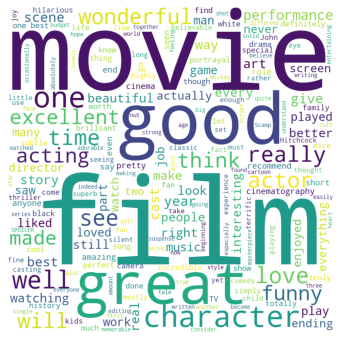

In [8]:
plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

##Negative review

In [9]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

In [10]:
wc.generate(negative_review)

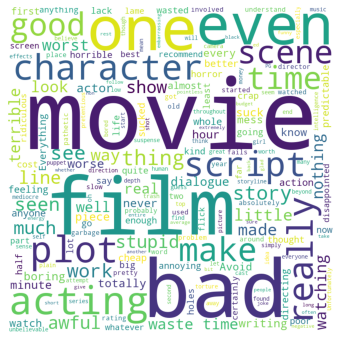

In [11]:
plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [12]:
# Feature and Target
X = df["review"]
y = df["sentiment"]

In [13]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [14]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [15]:
# vocabulary
tokenizer.index_word

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'is',
 6: 'this',
 7: 'it',
 8: 'i',
 9: 'to',
 10: 'in',
 11: 'was',
 12: 'movie',
 13: 'film',
 14: 'that',
 15: 'for',
 16: 'with',
 17: 'as',
 18: 'but',
 19: 'are',
 20: 'on',
 21: 'not',
 22: "it's",
 23: 'just',
 24: 'one',
 25: 'you',
 26: 'bad',
 27: 'an',
 28: 'all',
 29: 'so',
 30: 'about',
 31: 'at',
 32: 'very',
 33: 'there',
 34: 'like',
 35: 'good',
 36: 'by',
 37: 'from',
 38: 'have',
 39: 'time',
 40: 'he',
 41: 'out',
 42: 'even',
 43: 'acting',
 44: 'has',
 45: 'his',
 46: 'be',
 47: 'were',
 48: 'well',
 49: 'if',
 50: 'great',
 51: 'who',
 52: 'characters',
 53: 'how',
 54: 'more',
 55: 'my',
 56: 'or',
 57: 'really',
 58: 'see',
 59: 'when',
 60: 'some',
 61: 'than',
 62: 'no',
 63: 'best',
 64: 'plot',
 65: 'made',
 66: 'story',
 67: 'movies',
 68: 'character',
 69: "didn't",
 70: 'most',
 71: 'scenes',
 72: 'wonderful',
 73: 'its',
 74: 'better',
 75: "don't",
 76: '10',
 77: 'me',
 78: 'ever',
 79: 'they',
 80: 'what

In [16]:
vocab_len = len(tokenizer.index_word)
vocab_len

2486

In [17]:
# text to sequence
train_sequence = tokenizer.texts_to_sequences(X_train)

In [18]:
doc_len = []

for doc in train_sequence:
  doc_len.append(len(doc))

In [19]:
max(doc_len)

69

In [20]:
np.quantile(doc_len, 0.99)

45.0

In [21]:
max_length = 45

In [22]:
# padding
train_matrix = sequence.pad_sequences(train_sequence,max_length)
train_matrix

array([[  0,   0,   0, ..., 915, 532, 102],
       [  0,   0,   0, ...,   3, 377,  12],
       [  0,   0,   0, ...,   5, 378, 916],
       ...,
       [  0,   0,   0, ...,   3,  85,  12],
       [  0,   0,   0, ...,  20,   2,  20],
       [  0,   0,   0, ...,  22, 454, 840]], dtype=int32)

In [23]:
# test data
test_sequence = tokenizer.texts_to_sequences(X_test)
test_matrix = sequence.pad_sequences(test_sequence,max_length)
test_matrix

array([[  0,   0,   0, ...,   3, 388, 111],
       [  0,   0,   0, ...,   9, 101,  77],
       [  0,   0,   0, ...,  42,  35,  15],
       ...,
       [  0,   0,   0, ...,   3,  35, 222],
       [  0,   0,   0, ...,  22,  23, 551],
       [  0,   0,   0, ...,  12,   5, 128]], dtype=int32)

In [24]:
model = Sequential()
model.add(Embedding( input_dim=vocab_len+1,
                     output_dim=64,
                     input_length=max_length,
                     mask_zero=True))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [29]:
model.compile(optimizer="adam",loss="binary_crossentropy")
model.fit(train_matrix,y_train,epochs=10,batch_size=64)

Epoch 1/10
11/11 [==============================] - 1s 10ms/step - loss: 0.0033
Epoch 2/10
11/11 [==============================] - 0s 10ms/step - loss: 8.9201e-04
Epoch 3/10
11/11 [==============================] - 0s 12ms/step - loss: 4.1320e-04
Epoch 4/10
11/11 [==============================] - 0s 10ms/step - loss: 2.4209e-04
Epoch 5/10
11/11 [==============================] - 0s 9ms/step - loss: 1.6064e-04
Epoch 6/10
11/11 [==============================] - 0s 9ms/step - loss: 1.0339e-04
Epoch 7/10
11/11 [==============================] - 0s 9ms/step - loss: 7.7130e-05
Epoch 8/10
11/11 [==============================] - 0s 9ms/step - loss: 5.6008e-05
Epoch 9/10
11/11 [==============================] - 0s 9ms/step - loss: 4.6532e-05
Epoch 10/10
11/11 [==============================] - 0s 8ms/step - loss: 3.3277e-05


In [30]:
y_pred = model.predict(test_matrix)

In [31]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.66      0.65       151
           1       0.65      0.64      0.65       149

    accuracy                           0.65       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.65      0.65      0.65       300

